# 章節 9：二維空間

## 9.9 練習

習題 9.1：

本章的簡單模型，敵人對任何方向涉及的機率是相同的。此習題希望改善此模型。本章分析顯示敵人更有可能射擊最近的牆面。

但現實上，如果敵人接近牆面，他更不可能會射擊牆面，因為他不太可能沒看到自己與牆面之間的目標。

請設計一個模型將此行為考慮進去。試著建立一個更真實但不要太複雜的模型。

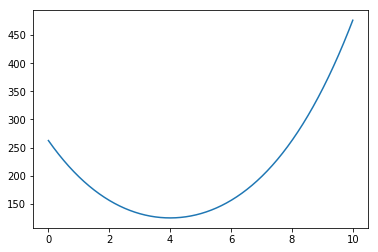

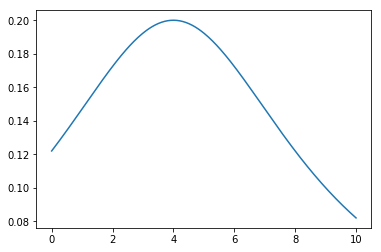

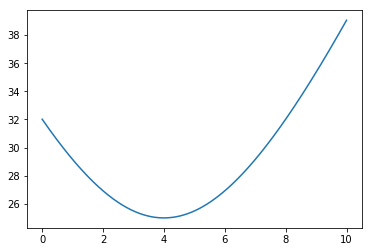

In [56]:
import numpy as np
import matplotlib.pyplot as plt


def StrafingSpeed(alpha, beta, x):
    # alpha, beta：敵人的座標
    # x：牆上漆彈的位置
    
    
    theta = math.atan2(x - alpha, beta)
    speed = beta / math.cos(theta)**2
    
    # 回傳 x 對 theta 的微分
    return speed


alpha, beta = 4, 5

xs = np.linspace(0, 10, 300)

#print(np.linalg.norm([3, 4])

distance = []
for x in xs:
    p1 = np.array([x, 0])
    p2 = np.array([alpha, beta])
    distance.append(np.linalg.norm(p1-p2))

distance = np.array(distance)**3

plt.plot(xs, distance)
plt.show()

ys = [1.0/StrafingSpeed(alpha, beta, x) for x in xs]
ys = np.array(ys)
plt.plot(xs, ys)
plt.show()

plt.plot(xs, distance*ys)
plt.show()

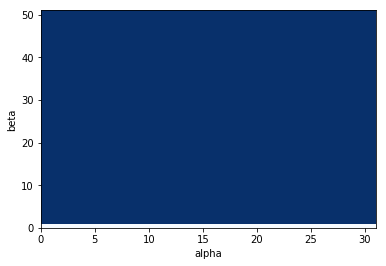

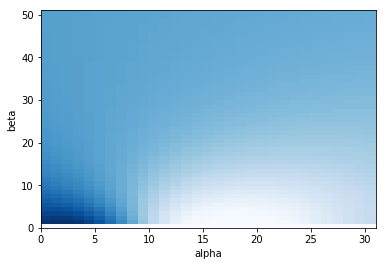

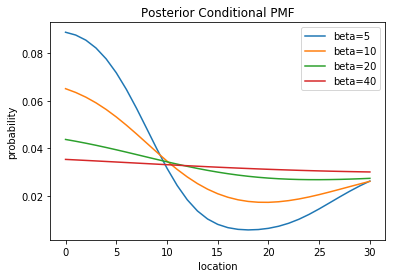

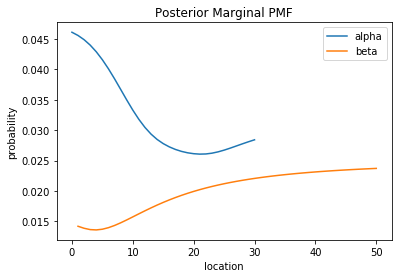

In [62]:
import thinkbayes as tb
import math
import matplotlib.pyplot as plt
import numpy as np


def plot_dist(dist, c=None):
    x, y = zip(*sorted(dist.Items()))
    plt.plot(x, y, c=c)

    
# Paintball 繼承自 Suite 以及 Joint
class Paintball(tb.Suite, tb.Joint):
    
    def __init__(self, alphas, betas, locations):
        # alphas：一序列的 alpha 值
        # betas：一序列的 beta 值
        
        # 所有可能漆彈的位置；為了之後 Likelihood 方法使用
        self.locations = locations
        
        # pairs：所有 alpha, beta 的配對
        pairs = [(alpha, beta)
            for alpha in alphas
            for beta in betas
        ]
        
        tb.Suite.__init__(self, pairs)
    
    
    def Likelihood(self, data, hypo):
        # alpha, beta：假設敵人的位置
        alpha, beta = hypo

        # x：觀察到的牆面漆彈位置
        x = data
        pmf = MakeLocationPmf(alpha, beta, self.locations)

        # 從建立好的 pmf 得到漆彈位置的似然性
        like = pmf.Prob(x)
        return like
  

def OpponentDistance(alpha, beta, location):
    p1 = np.array([alpha, beta])
    p2 = np.array([location, 0])
    return np.linalg.norm(p1-p2)


# 計算每個位置被漆彈打到的機率，跟掃射速度成反比
def MakeLocationPmf(alpha, beta, locations):
    # alpha, beta：敵人的座標
    # locations：一序列牆上漆彈的位置

    pmf = tb.Pmf()
    for x in locations:
        prob = (OpponentDistance(alpha, beta, x)**3) / StrafingSpeed(alpha, beta, x)
        #print(prob)
#        prob *= (OpponentDistance(alpha, beta, x))
        pmf.Set(x, prob)
        
    pmf.Normalize()
    # 回傳漆彈位置與其對應的機率
    return pmf       


def StrafingSpeed(alpha, beta, x):
    # alpha, beta：敵人的座標
    # x：牆上漆彈的位置
    
    
    theta = math.atan2(x - alpha, beta)
    speed = beta / math.cos(theta)**2
    
    # 回傳 x 對 theta 的微分
    return speed



def plot_two_dim(suite):
    d = dict((pair, 0) for pair in suite.Values())
    alphas, betas = zip(*d.keys())
    ci_map = np.zeros((max(betas)+1, max(alphas)+1))

    for (alpha, beta), v in suite.Items():
        ci_map[beta, alpha] += v
        
    plt.pcolor(ci_map, cmap='Blues')
    plt.xlabel("alpha")
    plt.ylabel("beta")
    plt.show()


alphas = range(0, 31)
betas = range(1, 51)
locations = range(0, 31)
suite = Paintball(alphas, betas, locations)

# 根據牆上漆彈位置更新先驗分佈

plot_two_dim(suite)
suite.UpdateSet([15, 16, 18, 21])

plot_two_dim(suite)


# 計算後驗的邊際分佈
marginal_alpha = suite.Marginal(0)
marginal_beta = suite.Marginal(1)


# 計算 alpha 在不同 beta 值下的條件分佈
betas = [5, 10, 20, 40]
legends = []
plt.title("Posterior Conditional PMF")
plt.xlabel("location")
plt.ylabel("probability")
for beta in betas:
    cond = suite.Conditional(0, 1, beta)
    plot_dist(cond)
    legends.append("beta=%d" % beta)
    
plt.legend(legends)
plt.show()

plt.title("Posterior Marginal PMF")
plt.xlabel("location")
plt.ylabel("probability")
plot_dist(marginal_alpha)
plot_dist(marginal_beta)
plt.legend(["alpha", "beta"])
plt.show()
